In [5]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import numpy as np

# 연습용 데이터

In [3]:
iris = datasets.load_iris()
# print(iris.DESCR)

In [4]:
print(iris.feature_names)
print(iris.target_names)

# iris.data
# iris.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


# sklearn
## 모델 분할

In [6]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(iris.data,iris.target, test_size=0.3, random_state=42)

## 학습 및 예측

In [9]:
model = linear_model.LinearRegression()

In [10]:
X_train = [[1],[2],[3]]
y_train = [2.3,3.99,5.4]

fit_model = model.fit(X_train, y_train)

In [11]:
X_test = [[3],[5]]
y_test = [6,10]

y_pred = fit_model.predict(X_test)
print(y_pred)

[5.44666667 8.54666667]


## 평가

In [12]:
mse = metrics.mean_squared_error(y_test,y_pred)
print(mse)

1.2091777777777777


In [13]:
print('RMSE:',np.sqrt(mse))

RMSE: 1.0996261991139433


In [14]:
r2 = metrics.r2_score(y_test,y_pred)
print(r2)

0.6977055555555556


In [15]:
fit_model.score(X_test,y_test) # 회귀분석의 경우 이렇게 하면 R2 반환

0.6977055555555556

In [ ]:
print('회귀계수:', fit_model.coef_)
print('회귀절편:', fit_model.intercept_)

## 시각화

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

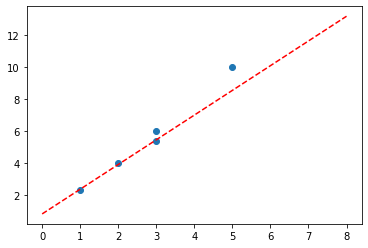

In [20]:
np.linspace(0,8) #균등한 선 만들어줌
xx = np.linspace(0,8)[:,np.newaxis] # 2차원으로 변경
yy = fit_model.predict(xx)


plt.plot(xx,yy,color='red',linestyle='--')
plt.scatter(X_train + X_test, y_train + y_test)
plt.show()

# statmodels 방법

In [ ]:
import statsmodels.api as sm

In [21]:
print(X_train,y_train)

[[1], [2], [3]] [2.3, 3.99, 5.4]


In [22]:
X_train2 = sm.add_constant(X_train) # 절편계산을 위해 X_0=1 추가
print(X_train2)

[[1. 1.]
 [1. 2.]
 [1. 3.]]


In [23]:
model2 = sm.OLS(y_train,X_train2)
fit_model2 = model2.fit()

In [24]:
X_test2 = sm.add_constant(X_test) 
y_pred2 = fit_model2.predict(X_test2)
print(y_pred2)
print(fit_model2.summary())

[5.44666667 8.54666667]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     367.7
Date:                Wed, 15 Jul 2020   Prob (F-statistic):             0.0332
Time:                        10:57:30   Log-Likelihood:                 3.8976
No. Observations:                   3   AIC:                            -3.795
Df Residuals:                       1   BIC:                            -5.598
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7967      0

C:\Users\User\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
